#importing data frames for analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 

#1-importing first data set
df1 = pd.read_csv('steps.csv', delimiter =';')

df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1.1 importing data frames for analysis

In [2]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


2) joining datframes

In [3]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


2) for this, considering a new column mean and loc, using the range of dates to be selected as columns for the mean, we get a new column with value mean steps for each user

In [4]:
df["mean"] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis = 1, skipna= True) 
df.head() 

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


3) afterwards, its possible to find the correlation among three different relevant values, mean, weight, height
A Matrix visualization would help up understanding what happens here.

In [5]:
corr = df[['mean', 'weight', 'height']].corr()

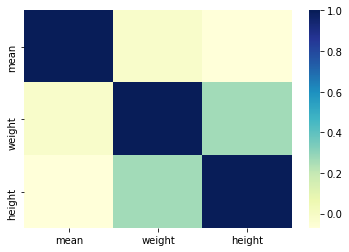

In [6]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

from the matrix plot can be concluded that weight and height are correlated positively. For more height, the tendency is more weight.
The correlation of the mean of steps by user and weight does not show a storng correlation and values remain close to 0.

3) The relation between two variables, mean and weight shows as follows:

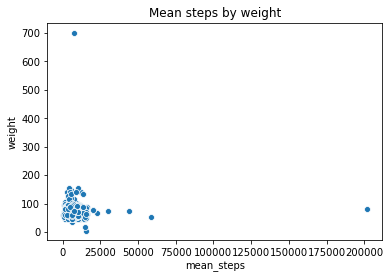

In [7]:
sns.scatterplot(x='mean', y='weight', data=df)
plt.xlabel('mean_steps')
plt.ylabel('weight')
plt.title('Mean steps by weight')
plt.show()

Thanks to the scatter plot, its possible to see that there are values way out of the normal mean. For this, we need to either remove these outliers or keep them. (It is never good to remove data but for this exercise we will have therefore better insights)
Weight above 200 will be deleted

In [8]:
#deleting outliers
df["weight"] = df["weight"]
def outlier(y):
    if(y > 200): 
        return float('NaN')
    else: 
        return y
df["weight"] = df["weight"].apply(outlier)

The same above applies for the mean steps. We need to avoid outliers, now, above 30.000 steps per day ( we will assume that someone was a runnerand  therefore it is also part of the representative group)


In [9]:
#deleting outliers
df["mean"] = df["mean"]
def outlier(x):
    if(x > 30000): 
        return float('NaN')
    else: 
        return x
df["mean"] = df["mean"].apply(outlier)

4) It is to be noted that now the graph look better, with the weight - mean steps distribution variating from 4.000 steps to 7.000 steps for the limits of 60 to 80 of weight.

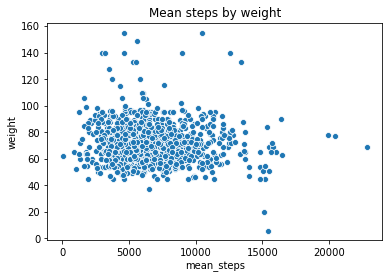

In [10]:
sns.scatterplot(x='mean', y='weight', data=df)
plt.xlabel('mean_steps')
plt.ylabel('weight')
plt.title('Mean steps by weight')
plt.show()

the relation is negative, meaning that with more weight mean_steps tend to decrease

5) The relation between two variables, mean steps and height shows as follows:

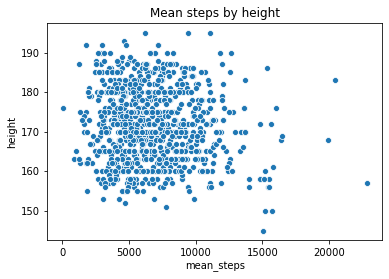

In [11]:
sns.scatterplot(x='mean', y='height', data=df)
plt.xlabel('mean_steps')
plt.ylabel('height')
plt.title('Mean steps by height')
plt.show()


the relation is positive, meaning that with more height mean_steps tend to increase

6) the correlation among the variables using the pearson method.

In [12]:
corr = corr.dropna() #I will drop the rows with NA, otherwise pearsonr won't work
print(pearsonr(corr['height'], corr['mean']))
print(pearsonr(corr['height'], corr['weight']))


(-0.7699883240044192, 0.44052399588362023)
(0.05879039122766941, 0.9625512809583929)


it can be concluded as follows:
for height and mean, the correlation is negative, values are relevant p < 0.0001
for height and weight, the correlation is positive and stronger, with values near 1 : p < 0.0001

7) its also innteresting to see how other variables behave.
For this, age and mean would help to answer my hypothesis:
young people should walk more than older ones?

firstly, we need to get the relevant columns doing a new df.

In [13]:
df_subsetting = df[["age", "mean"]].dropna()


we can visualize this to get quick conclusions:

Text(0.5, 1.0, 'Mean steps by age')

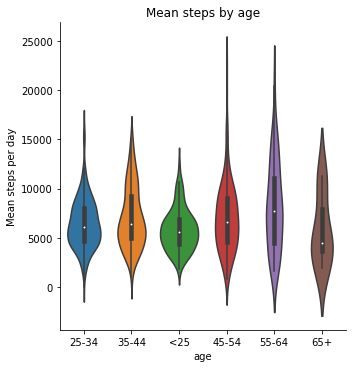

In [14]:
g = sns.catplot(x="age", y="mean",
               data=df_subsetting, kind="violin")
plt.xlabel("age") 
plt.ylabel("Mean steps per day")
plt.title("Mean steps by age")

as suppopsed, age plays a relevant factor, being the ranges with major mean of steps from 34 until below 25.

8) lets see who is walking more in average.



In [15]:
df_subsetting1 = df[["gender", "mean"]].dropna() # dropna returns a different series with nan removed


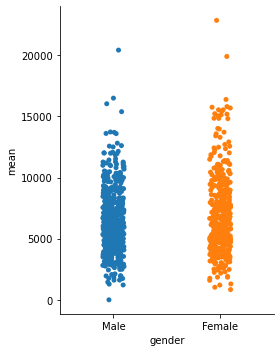

In [16]:
g = sns.catplot(x="gender", y="mean", data=df_subsetting1,
                height=5, aspect=.8)


even though there is an outlier by the females, they are apparently walking more than males.
This can be corroborated with an additional visualization

8.1) For that, a catplot selecting gender, cities and the mean will show us the performance of men and woman by city.

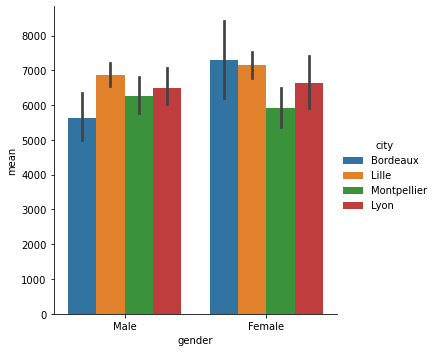

In [17]:
sns.catplot(x="gender", y="mean", hue="city", kind="bar", data=df)


Thus, can be confirmed that women in general walk more than men. Only in Montpellier  did happen the opposite, where the men walked above 6.000 steps while women below 6.000 steps 

A crosstab will show us the percentages that complete each city by gender

In [18]:
pd.crosstab(df["gender"],df["city"], normalize="columns")

city,Bordeaux,Lille,Lyon,Montpellier
gender,,,,
Female,0.434109,0.50099,0.464789,0.392157
Male,0.565891,0.49901,0.535211,0.607843


Thus, it is shown that most of the attendants of this research are men, despite Lille where the women showed a slightly major tenden dominance of participation.

THis can be ilustrated with a barchart representing in visualization what is mentioned above.

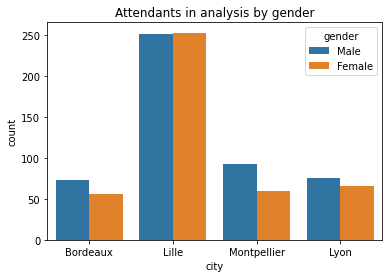

In [19]:
plot = sns.countplot(x = "city", hue = "gender", data = df,)
plt.xlabel("city")
plt.title("Attendants in analysis by gender")
plt.show()

For the barchart, it clearly shows that in Lille Women and Men were the major part of the research with a slightly difference in favor of women.
Furthermore, in other cities the people that volunteer to using the devices was much lower, mostly dominated by mens.

It is very interesting to relate this barchart to the one presented above in 8.1. Even though more males have taken part in  this research, women dominated the steps per day in all the cities (without Montpellier) even though there were less in number.  